##  How would you evaluate the performance of this scheme?

### PSNR and MSE is a measure to evaluvate the performance of this scheme

In [9]:
from PIL import Image
import numpy as np

### Original Image

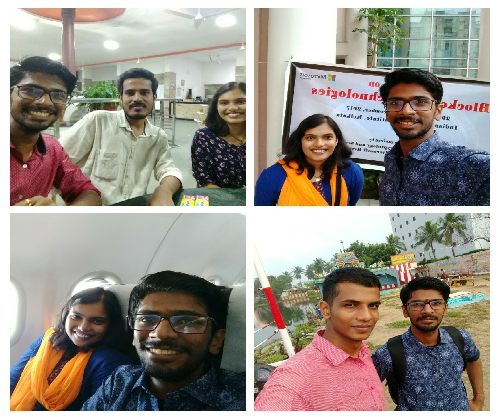

In [7]:

hfile = Image.open("friendss.jpg")
width = 500
height = 420
# use one of these filter options to resize the image
original_image  = hfile.resize((width, height), Image.NEAREST) 
original_image

### Decrypted Image

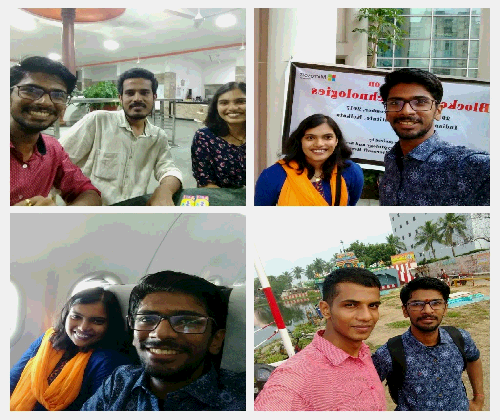

In [16]:
decrypted_image = Image.open("decrypted_image.png")
decrypted_image

### Orginal image converted to matrix

In [17]:
Ro = np.zeros((width, height))
Go = np.zeros((width, height))
Bo = np.zeros((width, height))

for i in range(0, width):
        for j in range(0, height):
            r, g, b = original_image.getpixel((i,j))
            Ro[i,j] = r
            Go[i,j] = g
            Bo[i,j] = b

### Decrypted image converted to matrix

In [18]:
Rd = np.zeros((width, height))
Gd = np.zeros((width, height))
Bd = np.zeros((width, height))

for i in range(0, width):
        for j in range(0, height):
            r, g, b = decrypted_image.getpixel((i,j))
            Rd[i,j] = r
            Gd[i,j] = g
            Bd[i,j] = b

In [23]:
def mse(O,D,width,height):
    mse = 0
    for i in range(0, width):
        for j in range(0, height):
            mse += (O[i,j] - D[i,j])**2
    return (1.0/(width*height)) * mse

In [26]:
MSE_R = mse(Ro,Rd,width,height)
MSE_G = mse(Go,Gd,width,height)
MSE_B = mse(Bo,Bd,width,height)

In [30]:
print 'MSE for Red channel',MSE_R ,'--MSE for Green channel', MSE_G, '--MSE for Blue channel',MSE_B

MSE for Red channel 95.97333809523809 --MSE for Green channel 99.16676666666666 --MSE for Blue channel 94.15915238095238


In [31]:
Average_MSE = (MSE_R + MSE_G + MSE_B)/3
Average_MSE

96.43308571428571

In [35]:
def psnr(MSE):
    PSNR = 20 * np.log10(255/np.sqrt(MSE))
    return PSNR

In [37]:
PSNR = psnr(Average_MSE)
PSNR

28.28854297111288

### Analysis

#### The best method should have very small Mean Squared Error. If MSE is very small then Peak Signal to Noise Ratio will be high.